## Analyze Biodiversity data from National Parks Service

Here are questions to answer:
* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?

This project idea and data is part of of Data Scientist Machine Learning Engineer Career Path provided by [Codecademy](https://www.codecademy.com).

Load python modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Load data

In [2]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

## Scoping

* ### Observations

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
print(f"observations shape:\n{observations.shape}\n")
print(f"observations unique:\n{observations.nunique()}\n")

observations shape:
(23296, 3)

observations unique:
scientific_name    5541
park_name             4
observations        304
dtype: int64



Here we have:
* 5541 unique observation scientific_names
* 4 unique park names

In [7]:
for column in observations.columns:
    print(f"number of unique {column}:{observations[column].nunique()}")
    print(f"unique {column}:{observations[column].unique()}\n")

number of unique scientific_name:5541
unique scientific_name:['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']

number of unique park_name:4
unique park_name:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

number of unique observations:304
unique observations:[ 68  77 138  84  85 112 228  39 168 250 103 114 101 279  72  65 143 165
 150  80  83 109 158 167 135 247  73 261 177 117  79  96 140 116 239 262
  71 176 148  76 235 283  25 246  64 281  88  67 254 152 147 213 265 107
 156  47 157  89 154 127 106  75  36 137 244  63 214  92 108  54 105 115
  98 223  82  90 218  58  59  48 208  95  70 100  49  56 134  91  86 136
 257 123 263 118 258 252  27  74  94 132  57 282 110 253 267 230 124 131
 164 260 119 233 245  60 151  66 206 189 242 111 120 243 276 237  29 220
 266 166  53 240  55 215 125  99 199 128 232 251 269 163  93 241 122  69
  97 14

And there is 3314739 observations in this dataset

In [8]:
observations.observations.sum()

3314739

* ### Species

In [9]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [10]:
species_info.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [11]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


* Data shape is 4 columns with 5824 rows in every column

In [12]:
print(f"observations shape:\n{species_info.shape}\n")
print(f"observations unique:\n{species_info.nunique()}\n")

observations shape:
(5824, 4)

observations unique:
category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64



There is:
* 7 unique categories
* 5541 unique scientific names
* 5504 common names 
* 4 conservation statuses

In [13]:
for column in species_info.columns:
    print(f"number of unique {column}:{species_info[column].nunique()}")
    print(f"unique {column}:{species_info[column].unique()}\n")

number of unique category:7
unique category:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

number of unique scientific_name:5541
unique scientific_name:['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']

number of unique common_names:5504
unique common_names:["Gapper's Red-Backed Vole" 'American Bison, Bison'
 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle' ...
 'Thicket Creeper, Virginia Creeper, Woodbine'
 'California Grape, California Wild Grape'
 'Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur']

number of unique conservation_status:4
unique conservation_status:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']



Deleting duplicates

In [14]:
duplicates = observations.duplicated()
duplicates.sum()

15

In [15]:
observations.drop_duplicates(subset=None, keep='first', inplace=False)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [16]:
duplicates = species_info.duplicated()
duplicates.sum()

0

Checking data missing

In [17]:
def missing_data(df, column):
    maxRows = df[column].count()
    print('% missing data')
    print((1 - df.count() / maxRows) * 100)


In [18]:
missing_data(observations, observations.columns[0])

% missing data
scientific_name    0.0
park_name          0.0
observations       0.0
dtype: float64


In [19]:
missing_data(species_info, species_info.columns[0])

% missing data
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


## Analysis
Firstly, let look at the `observations` dataset.

In [20]:
park_observations = observations.groupby(['park_name'])['observations'].sum()

In [21]:
park_observations

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

This graph shows numbers of observations 

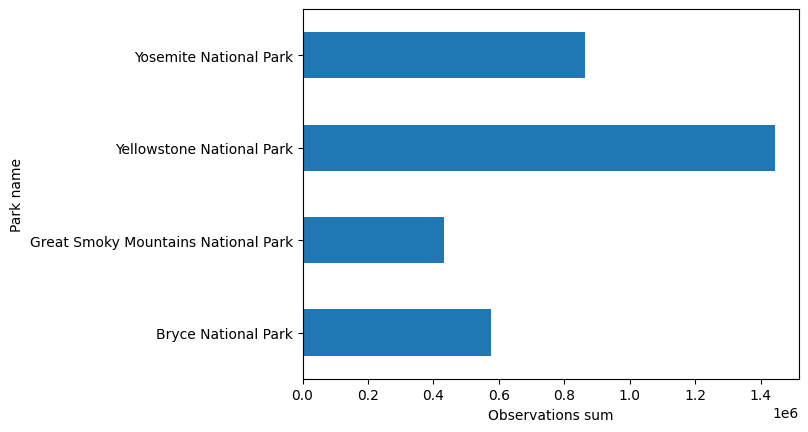

In [22]:
park_observations.plot(kind='barh')
plt.xlabel('Observations sum')
plt.ylabel('Park name')
plt.show()

In [23]:
species_categorys = species_info.groupby('category').size()

In [24]:
species_categorys.sort_index()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Dataset of species contains `vascular plants` as the most numerous category

<AxesSubplot: ylabel='category'>

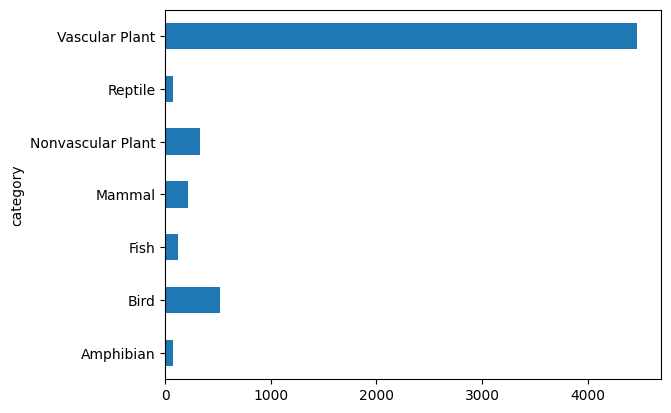

In [25]:
species_categorys.plot(kind='barh')

Lets inspect `conservation_status` column as it may lead to interesting conclusions and it may help giving the answer to first question:
* What is the distribution of conservation_status for animals?

In [26]:
print(f"number of conservations statuses:{species_info.conservation_status.nunique()}")
print(f"unique conservation statuses:{species_info.conservation_status.unique()}")

number of conservations statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [27]:
print(f"NAN values:{species_info.conservation_status.isna().sum()}")
print(species_info.groupby('conservation_status').size())

NAN values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


There is 5633 NaN values in species dataset which means that species with this value are not endangered. Nevertheless, dataset contains:
* 161 species of consern
* 16 endangered species
* 10 threatened species
* 4 species in recovery

<AxesSubplot: xlabel='conservation_status', ylabel='Count'>

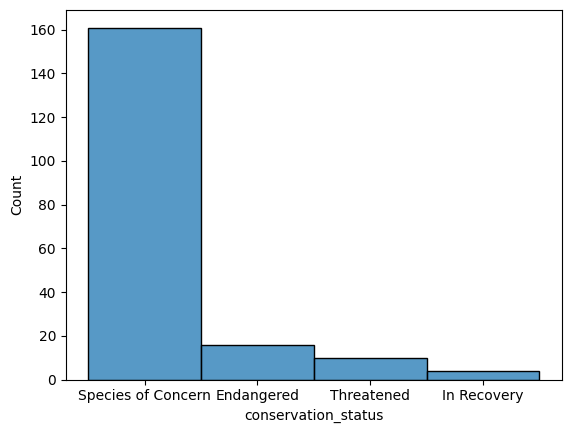

In [28]:
sns.histplot(
    species_info['conservation_status']
)

What this status actually mean?
* `Species of Concern` - a plant or animal for which we have concerns about its ability to remain on a landscape for a long time.
* `Threatened` - any species which is likely to become an endangered species within the foreseeable future throughout all or a significant portion of its range.
* `Endangered` - a type of organism that is threatened by extinction.
* `In recovery` - restoring endangered and threatened species to the point where they no longer require the safeguards of the Endangered Species Act.

In [29]:
species_info.fillna('No intervention', inplace=True)
species_status = species_info.groupby('conservation_status').size()

In [30]:
species_status

conservation_status
Endangered              16
In Recovery              4
No intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [31]:
species_status[2] / len(species_info)

0.9672046703296703

<AxesSubplot: ylabel='conservation_status'>

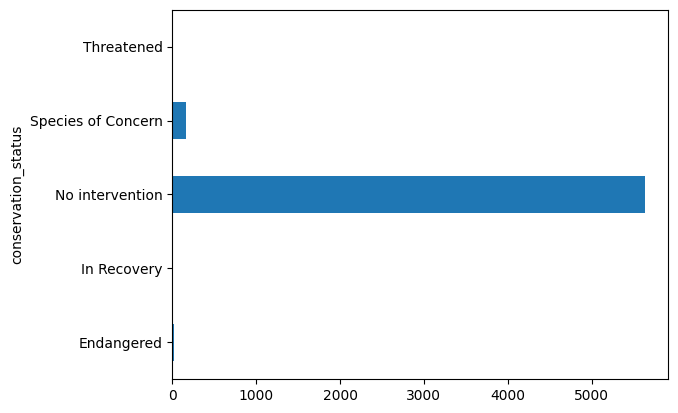

In [32]:
species_status.plot(kind='barh')

`No intervention` category is ~97% of data set `species_info`. To have better perspective of other classes lets get closer look into them without `No intervention` category.

In [33]:
conservation_categroies = species_info[species_info.conservation_status != "No intervention"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

conservation_categroies

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<AxesSubplot: ylabel='conservation_status'>

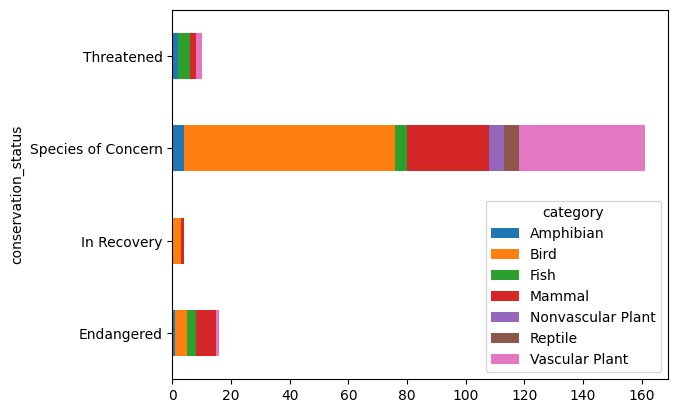

In [34]:
conservation_categroies.plot(kind='barh', stacked=True)

As plot presents:
* most `Threatened` species are fishes
* `Species of Concern` are mainly bird species
* species `In recovery` are mostyl birds
* most numerous `Endangered` species are mammals

For answering second question:
* Are certain types of species more likely to be endangered? 


There is a need to make some preparation. Lets setup new column in `species_info` data frame `protected`.

In [35]:
species_info['protected'] = species_info.conservation_status != 'No intervention'

species_info['protected']

0       False
1       False
2       False
3       False
4       False
        ...  
5819    False
5820    False
5821    False
5822    False
5823    False
Name: protected, Length: 5824, dtype: bool

In [36]:
protected_count = species_info.groupby(['category', 'protected']).scientific_name.nunique().reset_index().pivot(columns='protected', index='category', values='scientific_name').reset_index()

protected_count.columns = ['category', 'not_protected', 'protected']

protected_count

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [37]:
protected_count['percent'] = protected_count.protected / (protected_count.not_protected + protected_count.protected) * 100

protected_count['percent']

0     8.860759
1    15.368852
2     8.730159
3    17.045455
4     1.501502
5     6.410256
6     1.079305
Name: percent, dtype: float64

[Text(0, 0, 'Amphibian'),
 Text(0, 1, 'Bird'),
 Text(0, 2, 'Fish'),
 Text(0, 3, 'Mammal'),
 Text(0, 4, 'Nonvascular Plant'),
 Text(0, 5, 'Reptile'),
 Text(0, 6, 'Vascular Plant')]

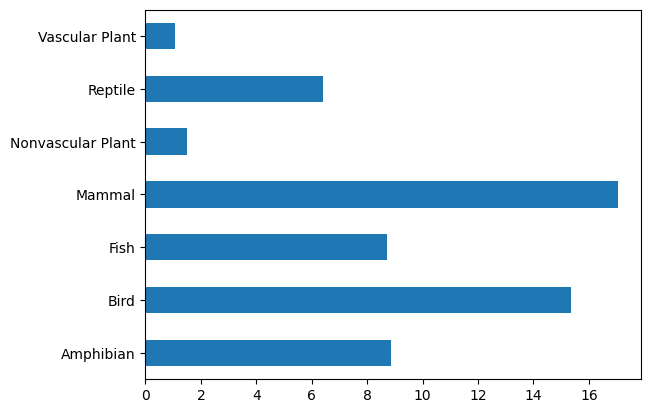

In [38]:
ax = protected_count['percent'].plot(kind='barh')
ax.set_yticklabels(protected_count.category.values)

Plot above is presenting that highest percent of species under protection were mammals (~17%) and birds (~15%)

To spot siginficance between two variables there will be need to use statistics. Chi-squared test will come in handy.
* Are the differences between species and their conservation status significant?

<b>Contingency tables</b> are used in statistics to summarize the relationship between several categorical variables.
A <b>chi-squared test</b> conducted on a contingency table can test whether or not a relationship exists between variables. If the <b>p-value</b> is small enough (usually p < 0.05 by convention), then the null hypothesis is rejected, and we conclude that the observed data does not follow the multinomial distribution.

In [39]:
from scipy.stats import chi2_contingency

protected_count

,category,not_protected,protected,percent
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [164]:
significance = {}


In [168]:

for i in range(len(protected_count)):
    for j in range(len(protected_count)):
        contigency = [list(protected_count.values[i][[2,1]]),
                      list(protected_count.values[j][[2,1]])]
        res = chi2_contingency(contigency)
        pvalue = res[1]
        if pvalue < 0.05:
            print(pvalue)
            significance.setdefault(protected_count.iloc[i][0], [])
            significance[protected_count.iloc[i][0]].append(protected_count.iloc[j][0])
            print(f'significant relationship between variables: {protected_count.iloc[i][0]} and {protected_count.iloc[j][0]}')


0.001778554820715609
significant relationship between variables: Amphibian and Nonvascular Plant
1.0441355146657018e-08
significant relationship between variables: Amphibian and Vascular Plant
1.0546306904975004e-10
significant relationship between variables: Bird and Nonvascular Plant
4.612268031690143e-79
significant relationship between variables: Bird and Vascular Plant
0.000496063322875284
significant relationship between variables: Fish and Nonvascular Plant
1.486846949188912e-12
significant relationship between variables: Fish and Vascular Plant
1.481868915759314e-10
significant relationship between variables: Mammal and Nonvascular Plant
0.03835559022969898
significant relationship between variables: Mammal and Reptile
1.4405067309854046e-55
significant relationship between variables: Mammal and Vascular Plant
0.001778554820715609
significant relationship between variables: Nonvascular Plant and Amphibian
1.0546306904974968e-10
significant relationship between variables: Nonvas

In [166]:
significance

{'Amphibian': ['Nonvascular Plant', 'Vascular Plant'],
 'Bird': ['Nonvascular Plant', 'Vascular Plant'],
 'Fish': ['Nonvascular Plant', 'Vascular Plant'],
 'Mammal': ['Nonvascular Plant', 'Reptile', 'Vascular Plant'],
 'Nonvascular Plant': ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile'],
 'Reptile': ['Mammal', 'Nonvascular Plant', 'Vascular Plant'],
 'Vascular Plant': ['Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile']}

As chi2 square test has shown, in the code above we have dictionary presenting categories with statistically significant difference between. Meaning the pvalue between them was < 0.05.

Lets try to ask the last question
* Which species were spotted the most at each park?